# Texas
## Contents
- [Imports](#Imports)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

# Imports

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data.
df = pd.read_csv('../data/cleaned_engineered_tx.csv')

In [3]:
df.head(2)

,county_state,total_cases,total_fatalities,death_rate,total_tests,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,...,percent_race_pop_other,percent_race_pop_minority,percent_sex_age_pop_0_to_44,percent_sex_age_pop_45_to_74,percent_sex_age_pop_75_and_over,percent_sex_age_pop_0_to_64,percent_sex_age_pop_65_and_over,percent_sex_age_pop_0_to_35,percent_sex_age_pop_35_to_59,percent_sex_age_pop_60_to_84
0,"Anderson County, Texas",2941.0,39.0,0.013261,30052,57863,10142,34312,12127,158,...,0.016643,0.407013,0.597619,0.344659,0.057723,0.858303,0.141697,0.426438,0.369684,0.189033
1,"Andrews County, Texas",584.0,10.0,0.017123,2127,17818,9979,7215,321,0,...,0.013470,0.595072,0.678022,0.277079,0.044898,0.896565,0.103435,0.554944,0.293299,0.138455


# Exploratory Data Analysis

## Correlations

In [4]:
# Extract the columns with percentages, save to a new dataframe.
df_percent = df.filter(regex = 'percent', axis = 1)

In [5]:
# Other metrics from the original dataframe to carry over.
# These were not total counts and thus not calculated in percentage step.
df_temp = df[[
    'county_state',
    'total_cases',
    'total_fatalities',
    'death_rate',
    'total_tests',
    'sex_age_median_age_in_years', 
    'inc_med_hhld_inc_dol',
    'inc_mean_hhld_inc_dol',
    'inc_per_capita_inc_dol',
    'inc_med_earn_male_full_yr_workers_dol',
    'inc_med_earn_female_full_yr_workers_dol',
    'deaths_per_100_cases',
    'cases_per_100_people',
    'tests_per_100_people',
    'pop_density',
    'covid_severity'
]]

In [6]:
# Concatenate the two dataframes to get a complete feature set.
df_percent = pd.concat([df_temp, df_percent], axis=1)

### Correlations for 'cases_per_100_people'

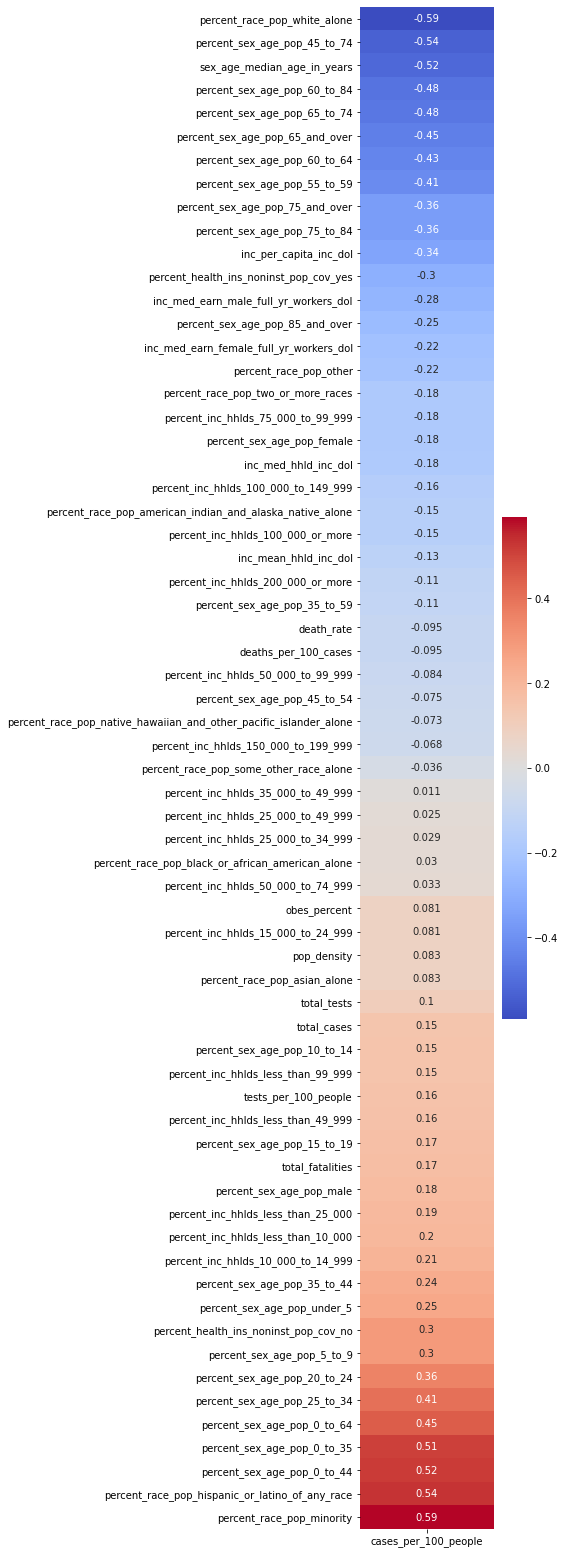

In [8]:
# Visualize the correlation between the variables and 'cases_per_100_people'.
# Save a correlation table to a variable.
corr = df_percent.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 28))
sns.heatmap(corr[['cases_per_100_people']].sort_values(by='cases_per_100_people').iloc[:-2], annot=True, cmap = 'coolwarm');

### Correlations for 'covid_severity'

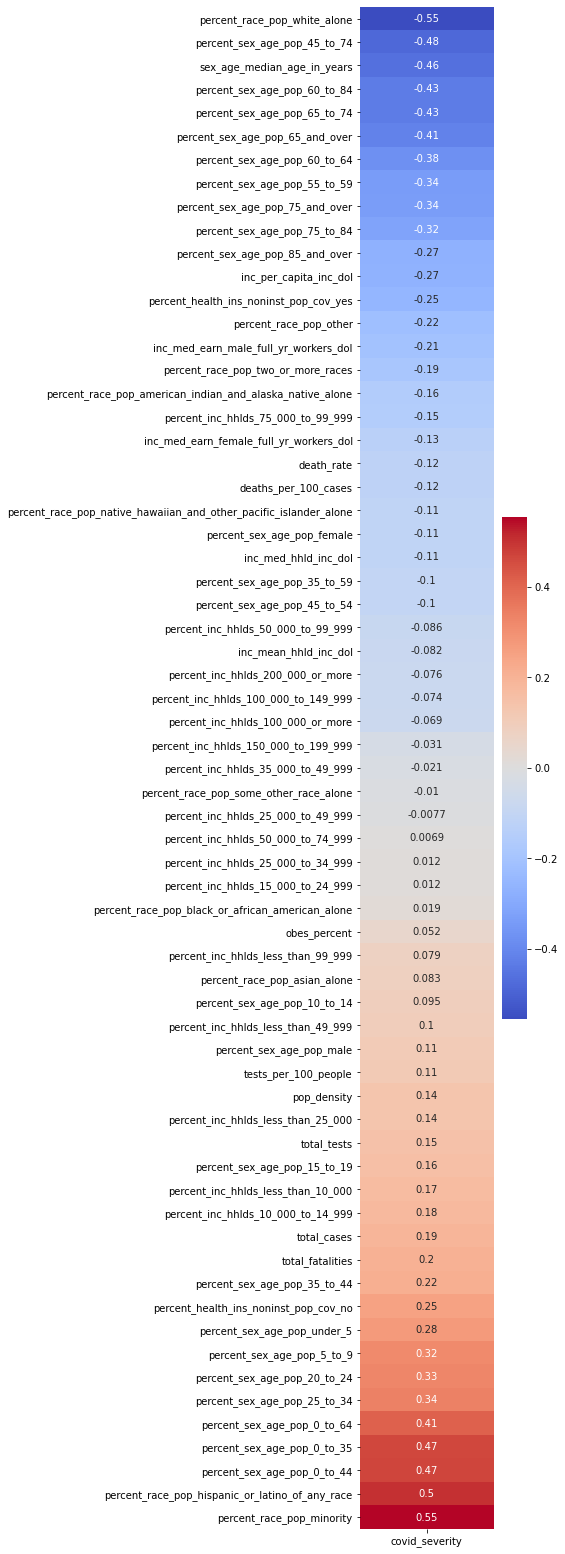

In [10]:
# Visualize the correlation between the variables and 'cases_per_100_people'.
# Save a correlation table to a variable.
corr = df_percent.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 28))
sns.heatmap(corr[['covid_severity']].sort_values(by='covid_severity').iloc[:-2], annot=True, cmap = 'coolwarm');

## Visualizing Distributions

In [11]:
# Define a custom function to help subplot histograms.
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, 
                       list_of_ylabels, figsize, bins, ncols, hspace):
    plt.style.use('seaborn-whitegrid')
    nrows = int(np.ceil(len(list_of_columns)/ncols))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize) 
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column], bins=bins)
        # Set title for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=14)        
        # Set xlabel for each subplot
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)
        # Set ylabel for each subplot
        ax[i].set_ylabel(list_of_ylabels[i], fontsize=12)
        plt.subplots_adjust(hspace=hspace);

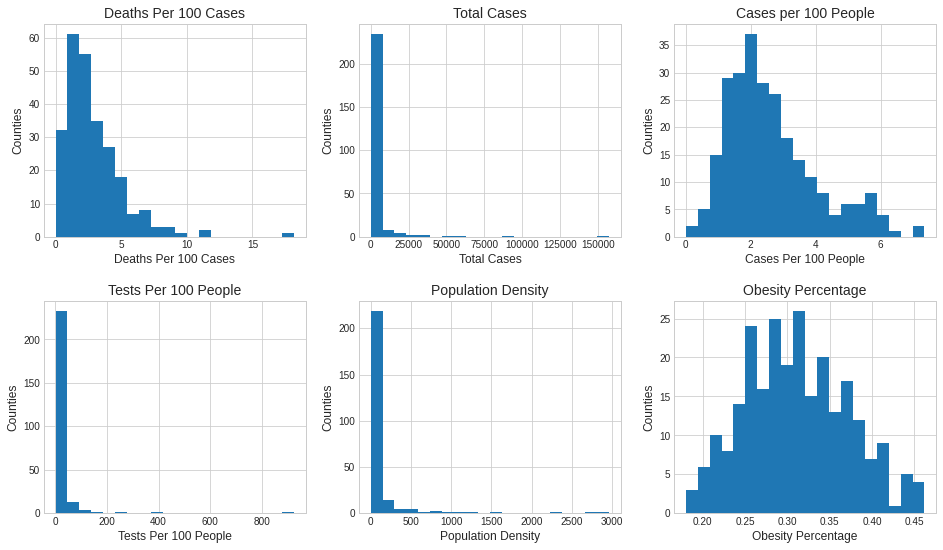

In [12]:
subplot_histograms(
    df,
    ['deaths_per_100_cases', 'total_cases', 'cases_per_100_people', 
     'tests_per_100_people', 'pop_density', 'obes_percent'],
    ['Deaths Per 100 Cases', 'Total Cases', 'Cases per 100 People', 
     'Tests Per 100 People', 'Population Density', 'Obesity Percentage'],
    ['Deaths Per 100 Cases', 'Total Cases', 'Cases Per 100 People', 
     'Tests Per 100 People', 'Population Density', 'Obesity Percentage'],
    ['Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties'],
    figsize=(16,9),
    bins=20,
    ncols=3,
    hspace=.3
)

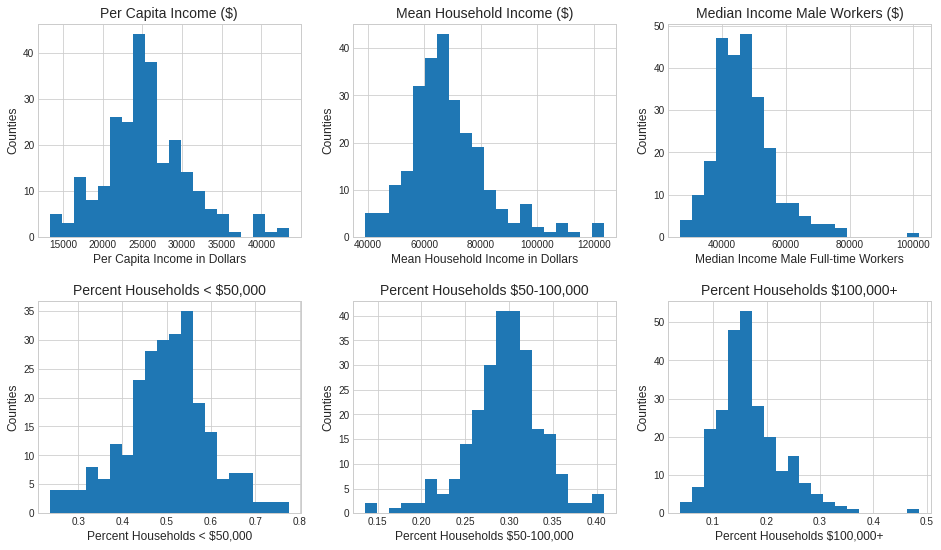

In [13]:
subplot_histograms(
    df,
    ['inc_per_capita_inc_dol', 'inc_mean_hhld_inc_dol', 'inc_med_earn_male_full_yr_workers_dol', 
     'percent_inc_hhlds_less_than_49_999', 'percent_inc_hhlds_50_000_to_99_999', 'percent_inc_hhlds_100_000_or_more'],
    ['Per Capita Income ($)', 'Mean Household Income ($)', 'Median Income Male Workers ($)', 
     'Percent Households < $50,000', 'Percent Households $50-100,000', 'Percent Households $100,000+'],
    ['Per Capita Income in Dollars', 'Mean Household Income in Dollars', 'Median Income Male Full-time Workers', 
     'Percent Households < $50,000', 'Percent Households $50-100,000', 'Percent Households $100,000+'],
    ['Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties'],
    figsize=(16,9),
    bins=20,
    ncols=3,
    hspace=.3
)

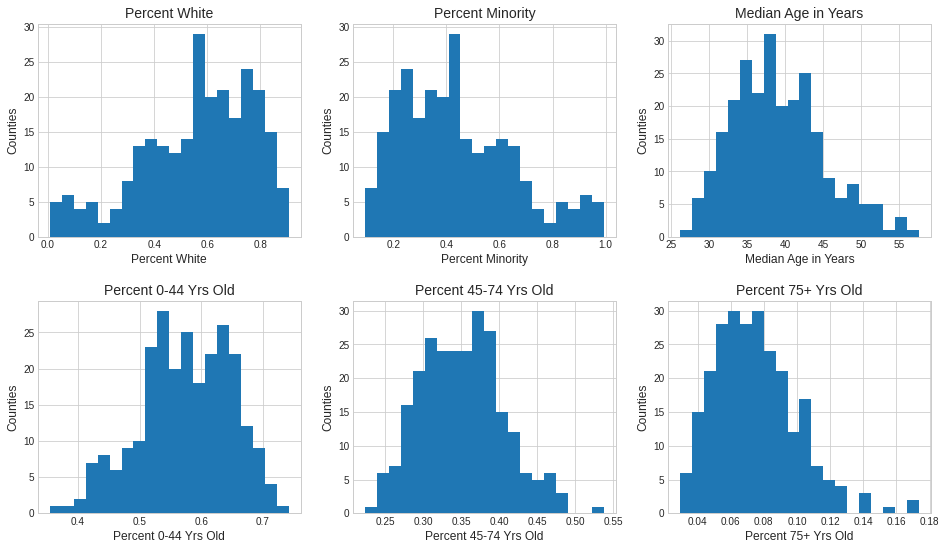

In [14]:
subplot_histograms(
    df,
    ['percent_race_pop_white_alone', 'percent_race_pop_minority', 'sex_age_median_age_in_years', 
     'percent_sex_age_pop_0_to_44', 'percent_sex_age_pop_45_to_74', 'percent_sex_age_pop_75_and_over'],
    ['Percent White', 'Percent Minority', 'Median Age in Years', 'Percent 0-44 Yrs Old', 
     'Percent 45-74 Yrs Old', 'Percent 75+ Yrs Old'],
    ['Percent White', 'Percent Minority', 'Median Age in Years', 'Percent 0-44 Yrs Old',
     'Percent 45-74 Yrs Old', 'Percent 75+ Yrs Old'],
    ['Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties'],
    figsize=(16,9),
    bins=20,
    ncols=3,
    hspace=.3
)

## Plotting variables against 'cases_per_100_people'

In [15]:
# Define a function to help subplot scatterplots.
def subplot_scatter(dataframe, list_of_xcolumns, list_of_ycolumns, list_of_titles, 
                    list_of_xlabels, list_of_ylabels, figsize, s, ncols, hspace):
    plt.style.use('seaborn-whitegrid')
    nrows = int(np.ceil(len(list_of_xcolumns)/ncols)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize) 
    ax = ax.ravel() 
    for i, xcolumn in enumerate(list_of_xcolumns): 
        ax[i].scatter(dataframe[xcolumn], dataframe[list_of_ycolumns[i]], s=s)
        # Set title for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=14)
        # Set xlabel for each subplot
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)
        # Set ylabel for each subplot
        ax[i].set_ylabel(list_of_ylabels[i], fontsize=12)
        plt.subplots_adjust(hspace=hspace);

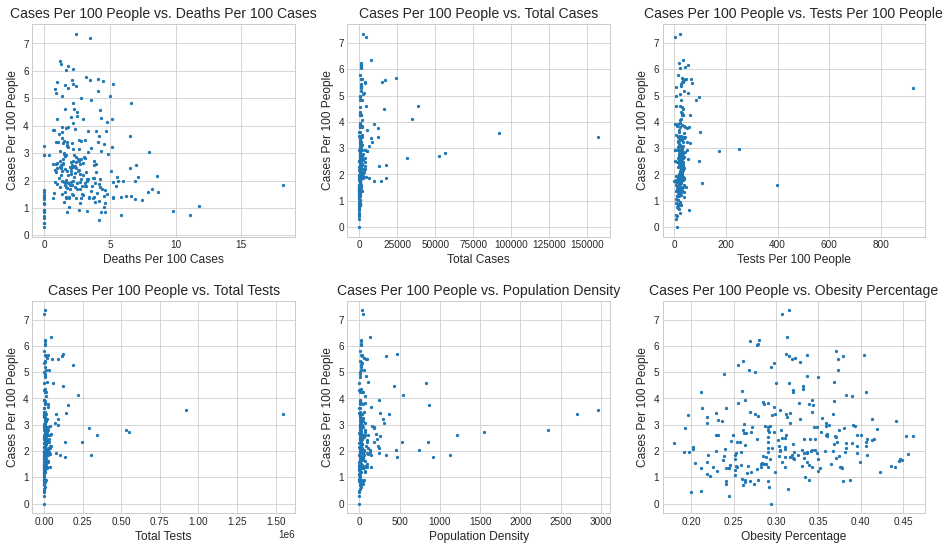

In [16]:
# Plot features of interest against cases_per_100_people.
subplot_scatter(
    df,
    list_of_xcolumns=[
        'deaths_per_100_cases', 'total_cases', 'tests_per_100_people', 
        'total_tests', 'pop_density', 'obes_percent'],
    list_of_ycolumns=[
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people', 
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people'],
    list_of_titles=[
        'Cases Per 100 People vs. Deaths Per 100 Cases',
        'Cases Per 100 People vs. Total Cases',
        'Cases Per 100 People vs. Tests Per 100 People',
        'Cases Per 100 People vs. Total Tests',
        'Cases Per 100 People vs. Population Density',
        'Cases Per 100 People vs. Obesity Percentage'],
    list_of_xlabels=[
        'Deaths Per 100 Cases', 'Total Cases', 'Tests Per 100 People',
        'Total Tests', 'Population Density', 'Obesity Percentage'],
    list_of_ylabels=[
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People',
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People'],
    figsize=(16,9), s=5, ncols=3, hspace=.3)

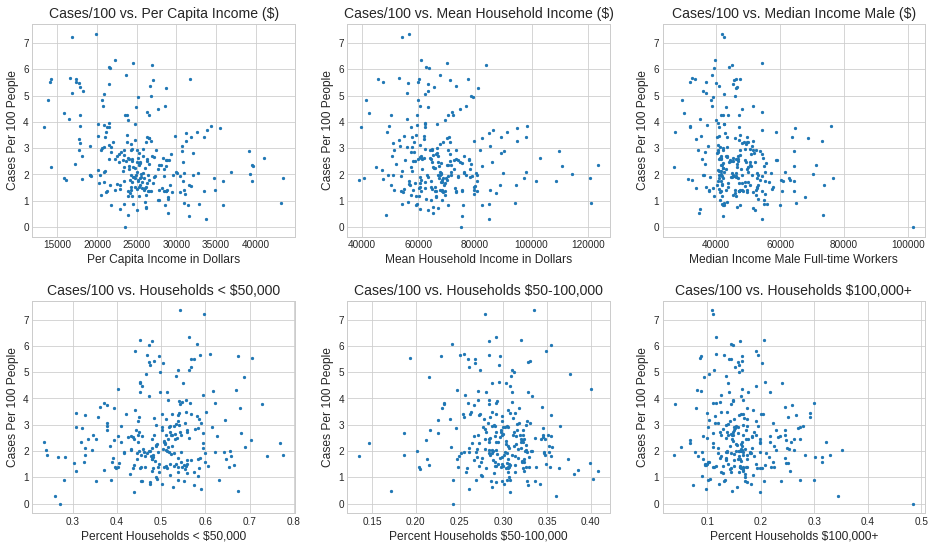

In [17]:
# Plot features of interest against cases_per_100_people.
subplot_scatter(
    df,
    list_of_xcolumns=[
        'inc_per_capita_inc_dol', 'inc_mean_hhld_inc_dol', 'inc_med_earn_male_full_yr_workers_dol', 
        'percent_inc_hhlds_less_than_49_999', 'percent_inc_hhlds_50_000_to_99_999', 'percent_inc_hhlds_100_000_or_more'],
    list_of_ycolumns=[
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people', 
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people'],
    list_of_titles=[
        'Cases/100 vs. Per Capita Income ($)', 'Cases/100 vs. Mean Household Income ($)',
        'Cases/100 vs. Median Income Male ($)', 'Cases/100 vs. Households < $50,000',
        'Cases/100 vs. Households $50-100,000', 'Cases/100 vs. Households $100,000+'],
    list_of_xlabels=[
        'Per Capita Income in Dollars', 'Mean Household Income in Dollars', 'Median Income Male Full-time Workers', 
        'Percent Households < $50,000', 'Percent Households $50-100,000', 'Percent Households $100,000+'],
    list_of_ylabels=[
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People',
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People'],
    figsize=(16,9), s=5, ncols=3, hspace=.3)

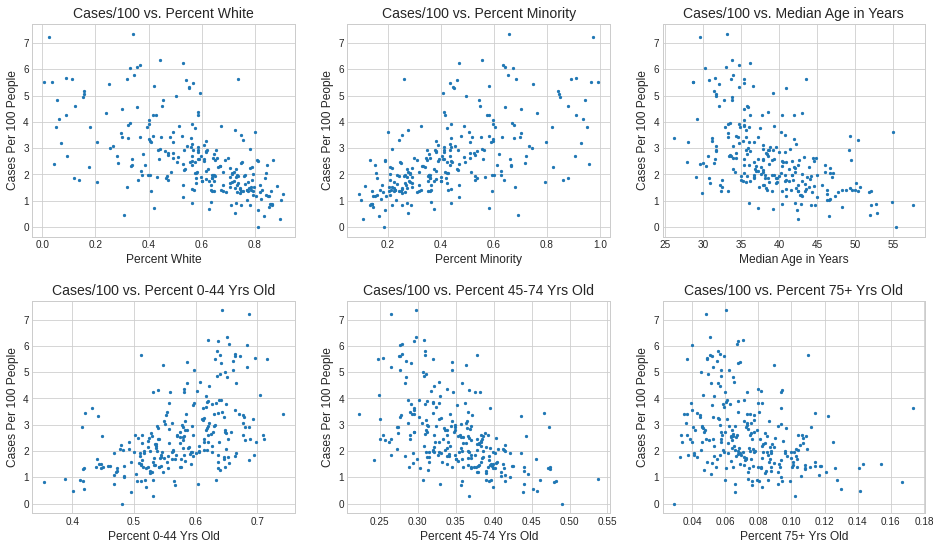

In [18]:
# Plot features of interest against cases_per_100_people.
subplot_scatter(
    df,
    list_of_xcolumns=[
        'percent_race_pop_white_alone', 'percent_race_pop_minority', 'sex_age_median_age_in_years', 
        'percent_sex_age_pop_0_to_44', 'percent_sex_age_pop_45_to_74', 'percent_sex_age_pop_75_and_over'],
    list_of_ycolumns=[
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people', 
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people'],
    list_of_titles=[
        'Cases/100 vs. Percent White', 'Cases/100 vs. Percent Minority',
        'Cases/100 vs. Median Age in Years', 'Cases/100 vs. Percent 0-44 Yrs Old',
        'Cases/100 vs. Percent 45-74 Yrs Old', 'Cases/100 vs. Percent 75+ Yrs Old'],
    list_of_xlabels=[
        'Percent White', 'Percent Minority', 'Median Age in Years', 
        'Percent 0-44 Yrs Old', 'Percent 45-74 Yrs Old', 'Percent 75+ Yrs Old'],
    list_of_ylabels=[
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People',
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People'],
    figsize=(16,9), s=5, ncols=3, hspace=.3)